# Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np


# Dataset

In [17]:
data_path = "eda/train_merged.csv"
df = pd.read_csv(data_path)
df.head()

,id,date,store_nbr,family,sales,onpromotion,day_type,day_locale,day_locale_name,day_description,day_transferred,oil_price,store_city,store_state,store_type,store_cluster
0,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
1,73063,2013-02-11,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
2,73064,2013-02-11,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
3,73065,2013-02-11,1,BEVERAGES,172.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
4,73066,2013-02-11,1,BOOKS,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13


In [18]:
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'day_type',
       'day_locale', 'day_locale_name', 'day_description', 'day_transferred',
       'oil_price', 'store_city', 'store_state', 'store_type',
       'store_cluster'],
      dtype='object')

# EDA

In [19]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,day_type,day_locale,day_locale_name,day_description,day_transferred,oil_price,store_city,store_state,store_type,store_cluster
0,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
1,73063,2013-02-11,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
2,73064,2013-02-11,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
3,73065,2013-02-11,1,BEVERAGES,172.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
4,73066,2013-02-11,1,BOOKS,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13


In [20]:
df.describe()

,id,store_nbr,sales,onpromotion,oil_price,store_cluster
count,3.225420e+05,322542.000000,322542.000000,322542.000000,322542.000000,322542.000000
mean,1.612773e+06,27.500000,375.094147,3.371877,65.369558,8.481481
std,7.873296e+05,15.585808,1202.767319,15.064912,25.489987,4.649741
min,7.306200e+04,1.000000,0.000000,0.000000,27.960000,1.000000
25%,9.716352e+05,14.000000,0.000000,0.000000,44.880000,4.000000
50%,1.692008e+06,27.500000,13.000000,0.000000,52.010000,8.500000
75%,2.181836e+06,41.000000,208.360000,0.000000,95.250000,13.000000
max,3.000887e+06,54.000000,124717.000000,716.000000,107.950000,17.000000


In [21]:
df.isna().sum()

id                 0
date               0
store_nbr          0
family             0
sales              0
onpromotion        0
day_type           0
day_locale         0
day_locale_name    0
day_description    0
day_transferred    0
oil_price          0
store_city         0
store_state        0
store_type         0
store_cluster      0
dtype: int64

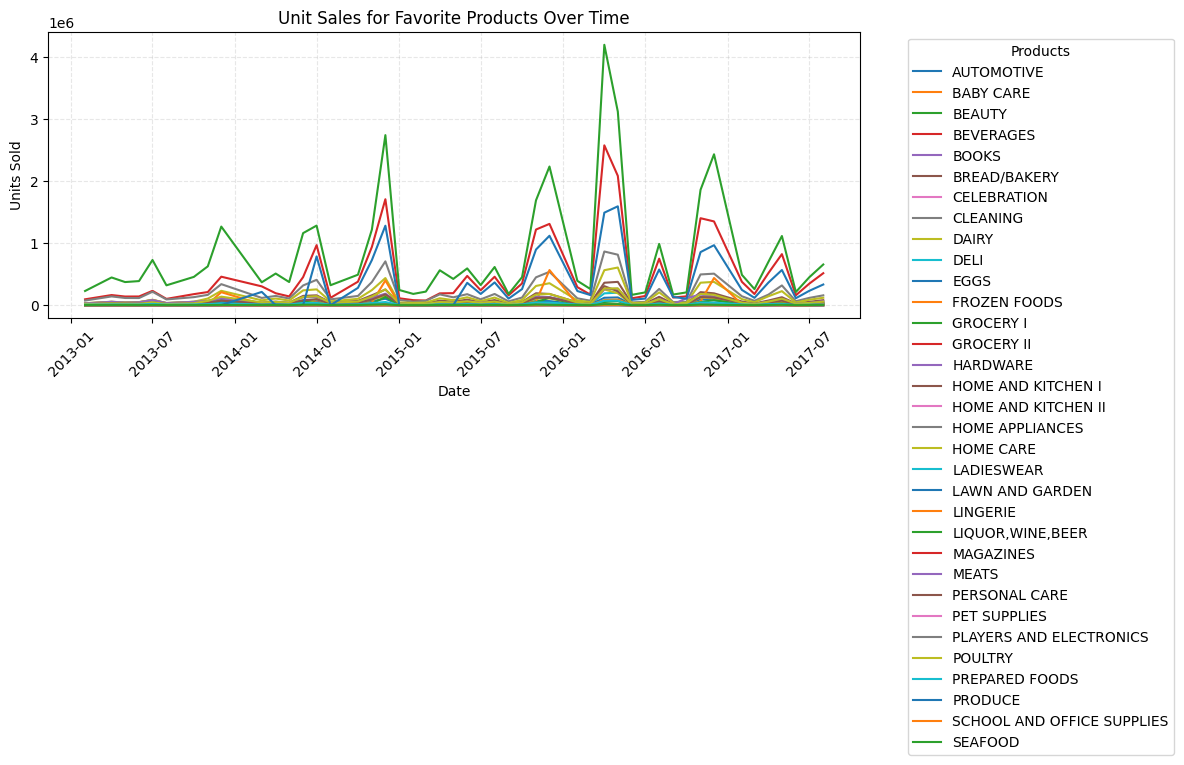

In [22]:
# Unit sales for each product

df['date'] = pd.to_datetime(df['date'])
ts = (
    df.groupby([df['date'].dt.to_period("M"), 'family'])['sales']
    .sum()
    .reset_index()
)
ts['date'] = ts['date'].dt.to_timestamp()

# Plot
ts_pivot = ts.pivot(index='date', columns='family', values='sales')
plt.figure(figsize=(12,6))
for product in ts_pivot.columns:
    plt.plot(ts_pivot.index, ts_pivot[product], label=product)

plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.title("Unit Sales for Favorite Products Over Time")
plt.legend(title="Products", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


In [23]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,day_type,day_locale,day_locale_name,day_description,day_transferred,oil_price,store_city,store_state,store_type,store_cluster
0,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
1,73063,2013-02-11,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
2,73064,2013-02-11,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
3,73065,2013-02-11,1,BEVERAGES,172.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
4,73066,2013-02-11,1,BOOKS,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13


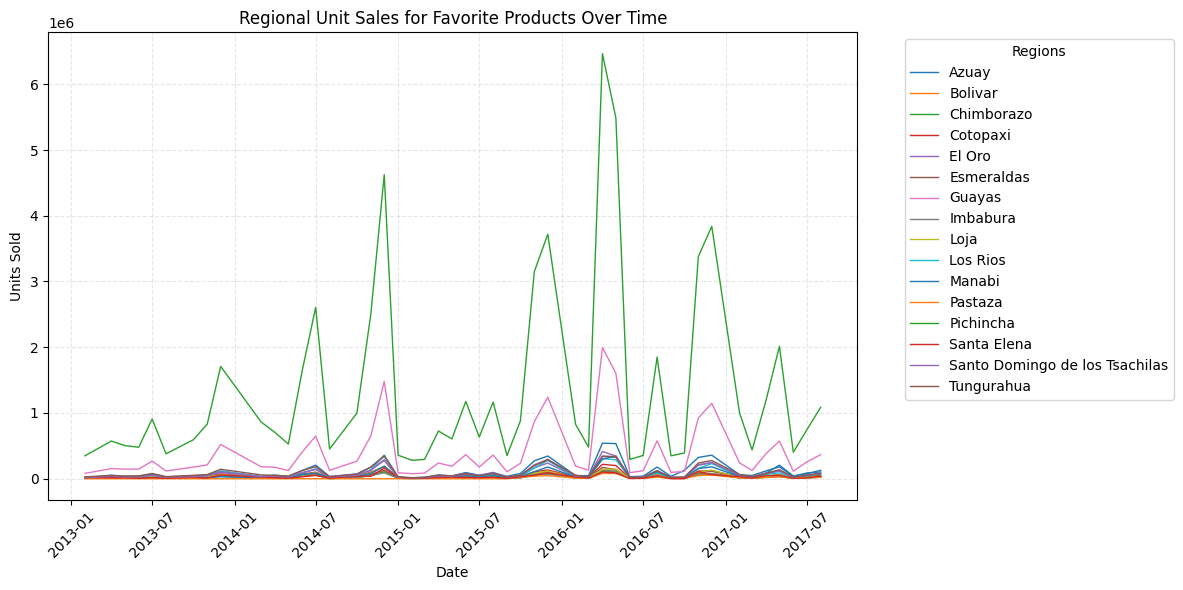

In [24]:
# Regional unit sales for each product

df['date'] = pd.to_datetime(df['date'])
ts = (
    df.groupby([df['date'].dt.to_period("M"), 'store_state'])['sales']
    .sum()
    .reset_index()
)
ts['date'] = ts['date'].dt.to_timestamp()

# Plot
ts_pivot = ts.pivot(index='date', columns='store_state', values='sales')
plt.figure(figsize=(12,6))
for region in ts_pivot.columns:
    plt.plot(ts_pivot.index, ts_pivot[region], label=region, linewidth=1)

plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.title("Regional Unit Sales for Favorite Products Over Time")
plt.legend(title="Regions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


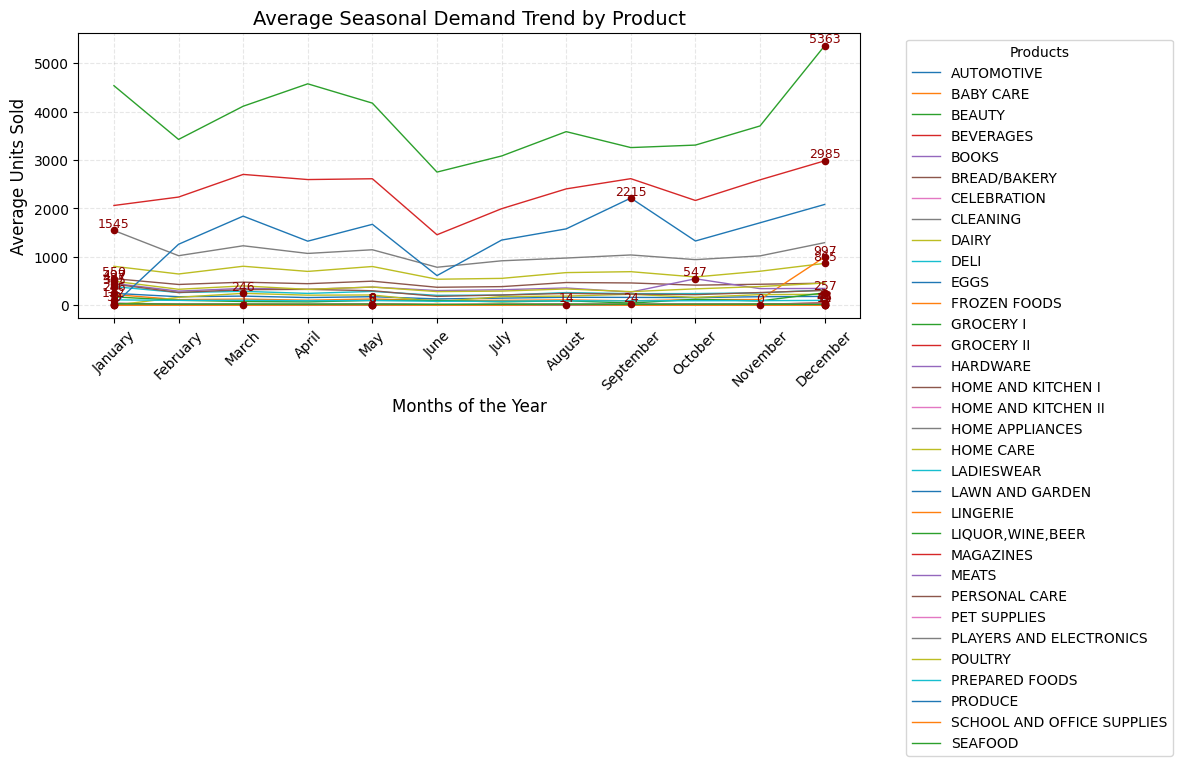

In [25]:
# Seasonal Demand for each Product
df['date'] = pd.to_datetime(df['date'])
df['MonthName'] = df['date'].dt.month_name()

# Aggregate: average monthly sales per product
seasonal = (
    df.groupby(['MonthName','family'])['sales']
    .mean()
    .reset_index()
    .pivot(index='MonthName', columns='family', values='sales')
    .reindex(
        months_order := ["January","February","March","April","May","June",
                         "July","August","September","October","November","December"]
        )
    )

# Plot
plt.figure(figsize=(12,6))

for product in seasonal.columns:
    plt.plot(seasonal.index, seasonal[product], linewidth=1, label=product)

    # Find the max month + value for this product
    max_idx = seasonal[product].idxmax()
    max_val = seasonal[product].max()

    # Highlight the spike
    plt.scatter(max_idx, max_val, color="darkred", s=20, zorder=5)
    plt.text(max_idx, max_val, f"{max_val:.0f}",
             ha="center", va="bottom", fontsize=9, color="darkred")

plt.xlabel("Months of the Year", fontsize=12)
plt.ylabel("Average Units Sold", fontsize=12)
plt.title("Average Seasonal Demand Trend by Product", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend(title="Products", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


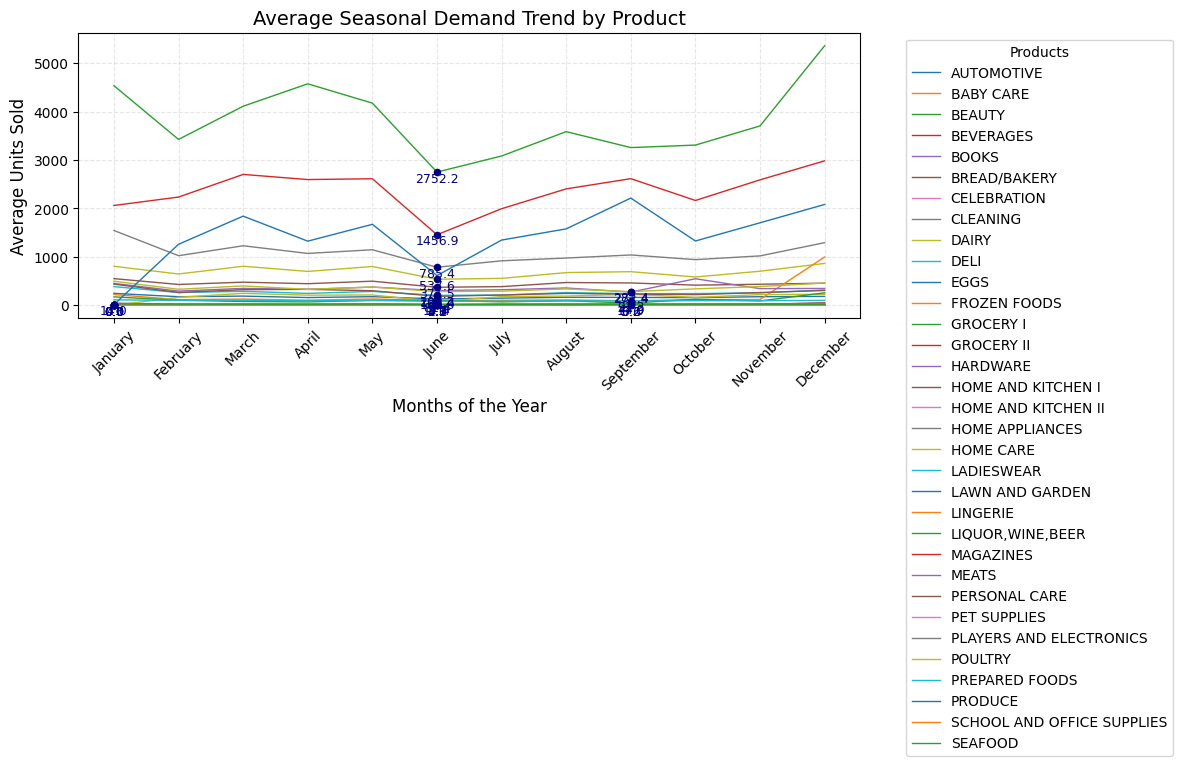

In [26]:
plt.figure(figsize=(12,6))
for product in seasonal.columns:
    plt.plot(seasonal.index, seasonal[product], linewidth=1, label=product)

    # Find the min month + min value for this product
    min_month = seasonal[product].idxmin()
    min_value = seasonal[product].min()

    # Highlight with scatter
    plt.scatter(min_month, min_value, color="darkblue", s=20, zorder=5)

    # Annotate the min spike
    plt.text(min_month, min_value, f"{min_value:.1f}",
             ha="center", va="top", fontsize=9, color="darkblue")

plt.xlabel("Months of the Year", fontsize=12)
plt.ylabel("Average Units Sold", fontsize=12)
plt.title("Average Seasonal Demand Trend by Product", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend(title="Products", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# ARIMA

In [28]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [27]:
df['date'] = pd.to_datetime(df['date'])

# Group by Product and Date (monthly resample)
ts = (
    df.groupby(['family', pd.Grouper(key='date')])['sales']
    .sum()
    .reset_index()
)

In [48]:
def get_prod_data(prod_name):
  data = ts[ts['family'] == prod_name].copy()
  data.drop('family', axis=1, inplace=True)

  # Make sure Units Sold is numeric
  data['sales'] = pd.to_numeric(data['sales'], errors='coerce')
  ts_men = data.dropna(subset=['sales'])

  # --- Ensure datetime format and sorting ---
  data['date'] = pd.to_datetime(data['date'])
  data = data.sort_values('date')
  data.set_index('date', inplace=True)

  # Split data into train and test
  train_size = int(len(data) * 0.9)
  train, test = data.iloc[:train_size], data.iloc[train_size:]

  return train, test

def train_model(train, test, prod_name):
  # --- Fit ARIMA model ---
  model = ARIMA(train['sales'], order=(2,1,3))
  model_fit = model.fit()

  # Forecast over the test period
  forecast = model_fit.forecast(steps=len(test))

  # Plot Train, Test, and Forecast
  plt.figure(figsize=(12,6))
  plt.plot(train.index, train['sales'], label="Train")
  plt.plot(test.index, test['sales'], label="Test (True)", color="green")
  plt.plot(test.index, forecast, label="Forecast (Predicted)", color="orange")

  plt.title(f"ARIMA Forecast - {prod_name}")
  plt.xlabel("Date")
  plt.ylabel("Sales")
  plt.legend()
  plt.show()

  test_units = test['sales']

  y_true = test_units.values
  y_pred = forecast.values


  # calculate MAE
  mae = float(np.abs(y_true - y_pred).mean())
  print(f"MAE: {mae:.4f}")
  
  # calculate WAPE
  denom = np.abs(y_true).sum() + 1e-8
  wape = float(np.abs(y_true - y_pred).sum() / denom)
  print(f"WAPE: {wape:.4f}")

  # calculate SMAPE
  denom = (np.abs(y_true) + np.abs(y_pred)) + 1e-8
  smape = float((2.0 * np.abs(y_true - y_pred) / denom).mean())
  print(f"SMAPE: {smape:.4f}")

/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

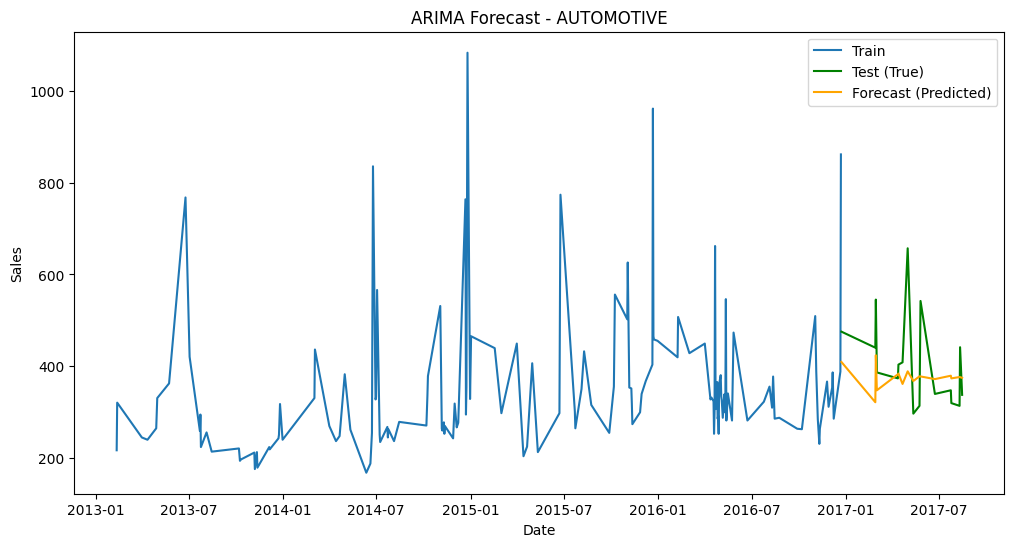

/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

MAE: 74.9590
WAPE: 0.1838
SMAPE: 0.1807


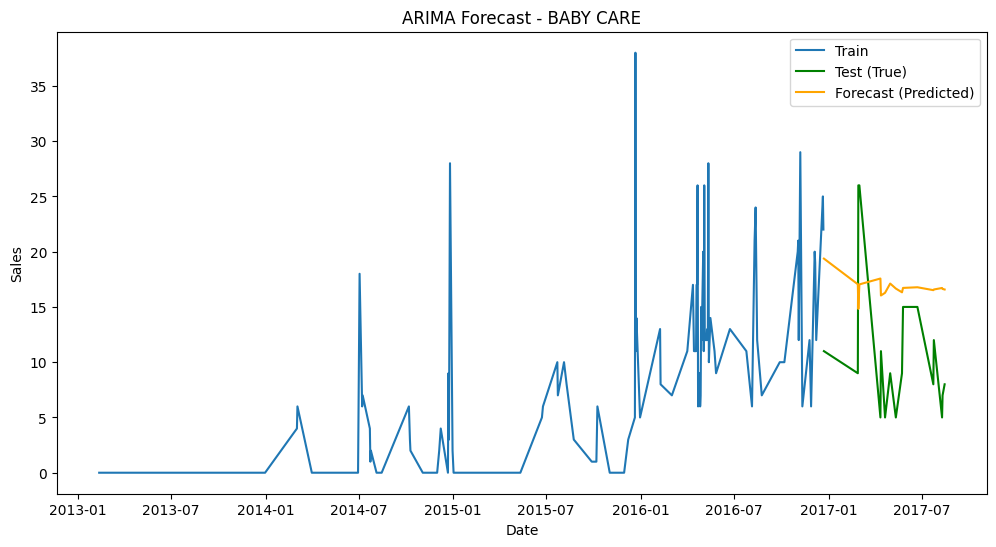

MAE: 8.1804
WAPE: 0.7477
SMAPE: 0.6344


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

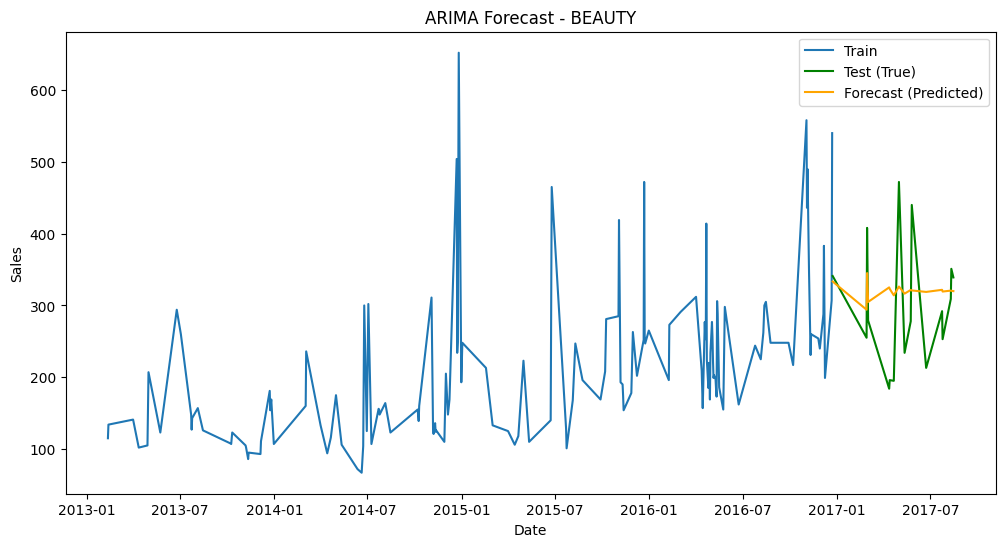

MAE: 69.2297
WAPE: 0.2336
SMAPE: 0.2334


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

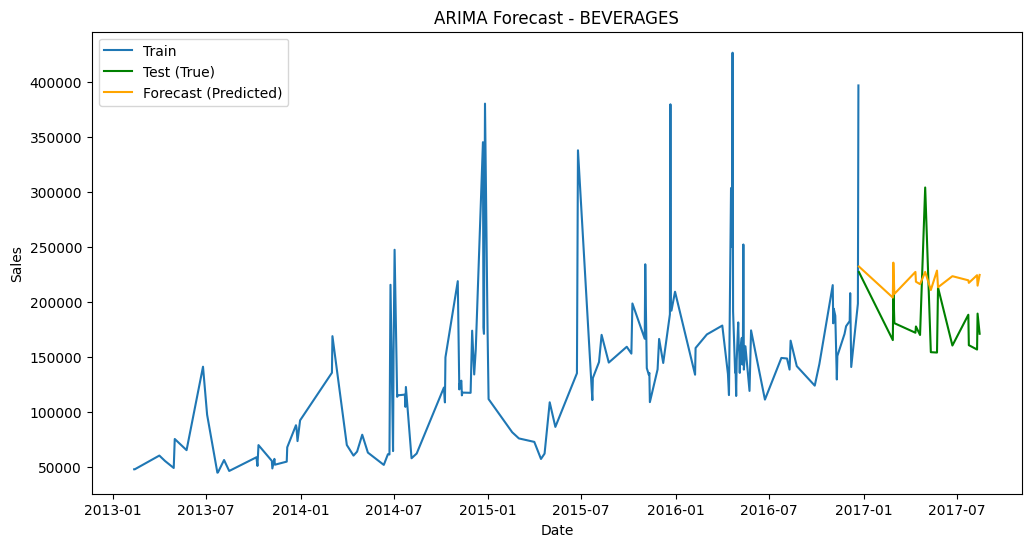

MAE: 43593.5843
WAPE: 0.2350
SMAPE: 0.2188


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

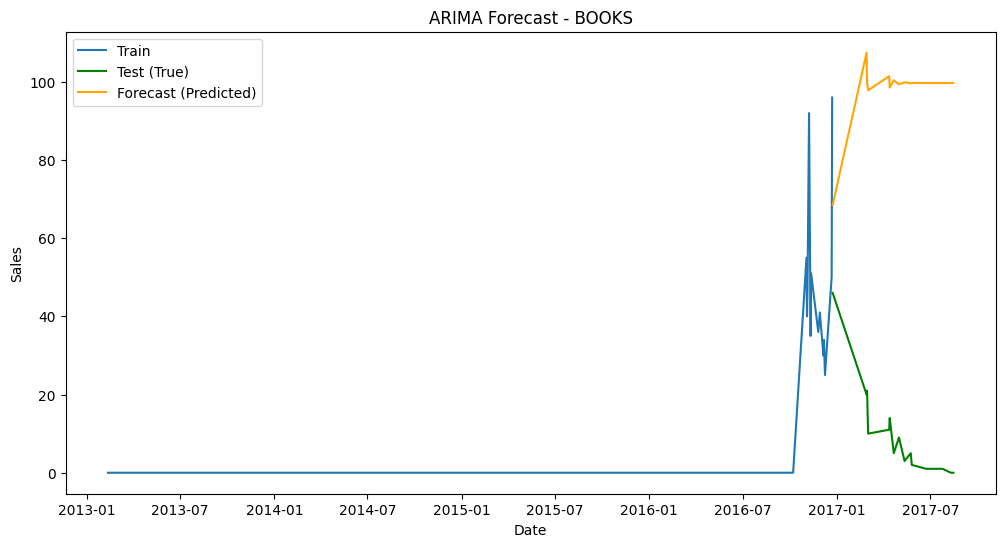

MAE: 89.5236
WAPE: 10.2141
SMAPE: 1.6931


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

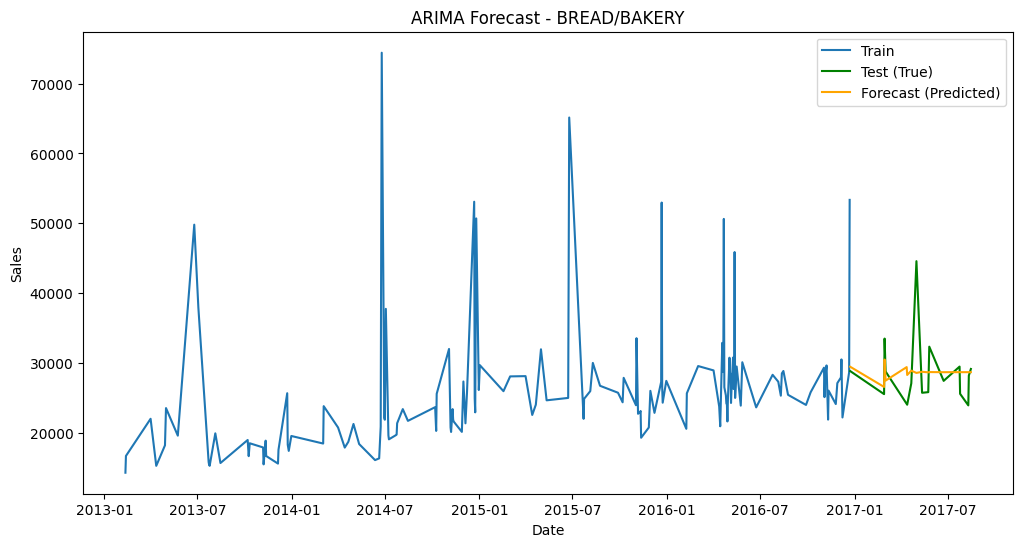

/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MAE: 3151.4211
WAPE: 0.1106
SMAPE: 0.1055


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


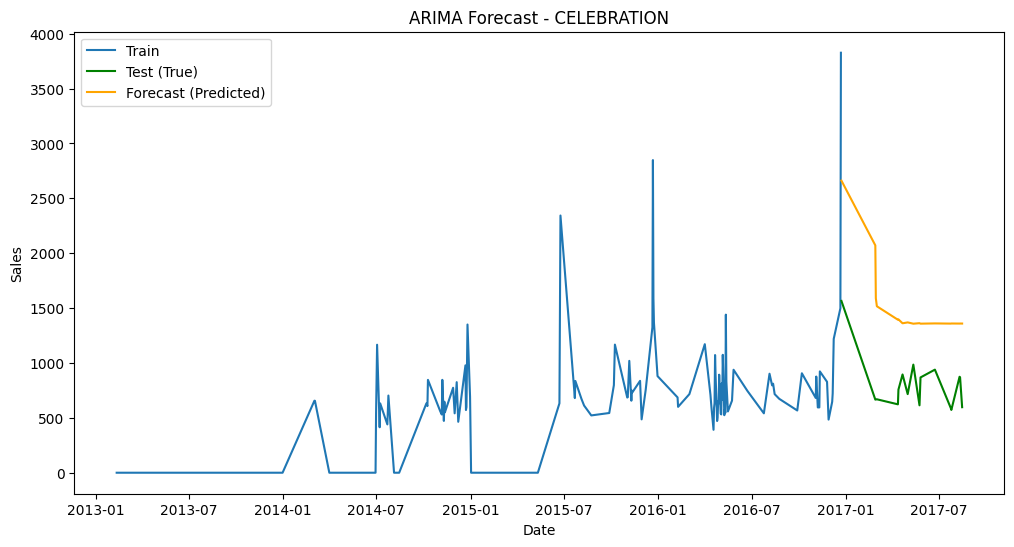

MAE: 713.3140
WAPE: 0.9006
SMAPE: 0.6281


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

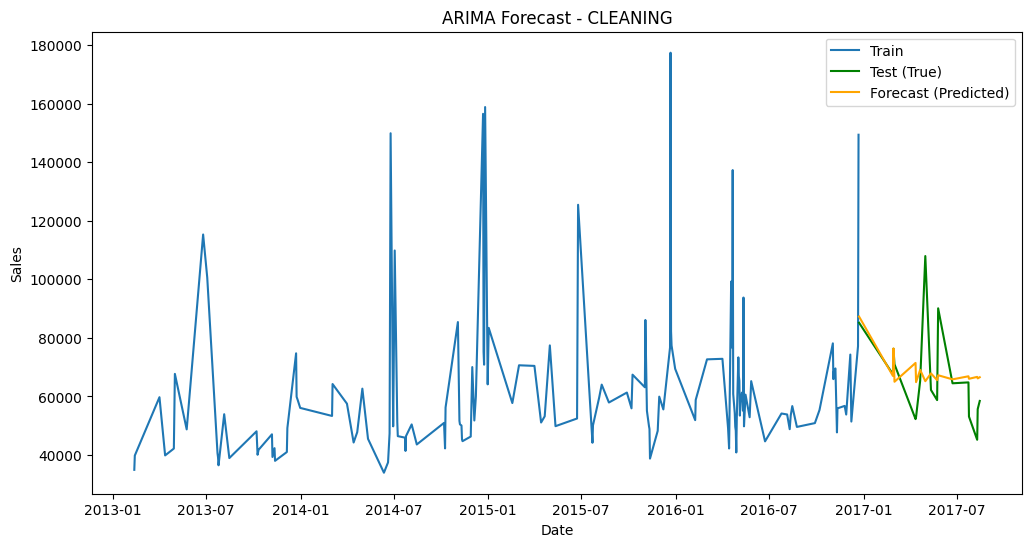

MAE: 10475.7759
WAPE: 0.1574
SMAPE: 0.1544


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

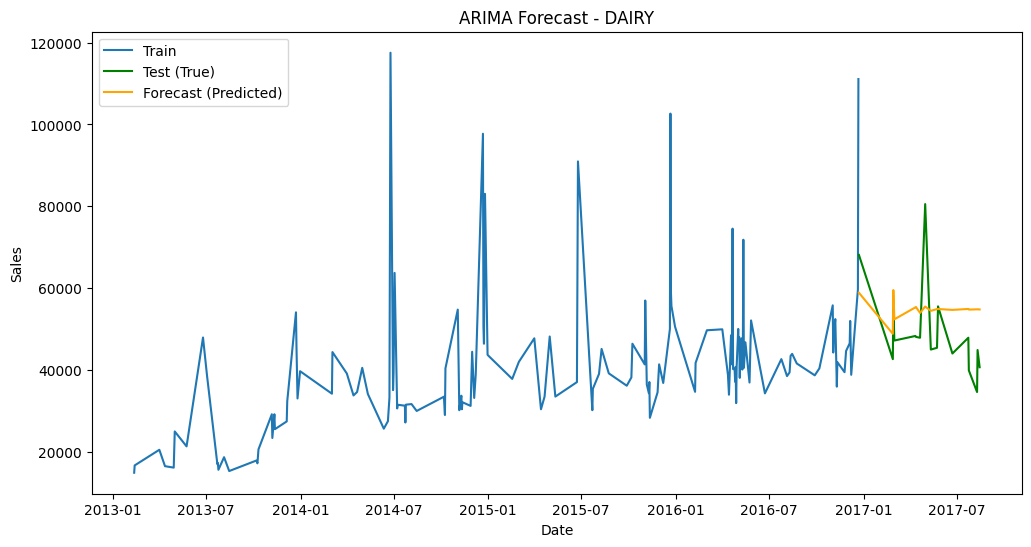

MAE: 9782.0231
WAPE: 0.1988
SMAPE: 0.1893


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

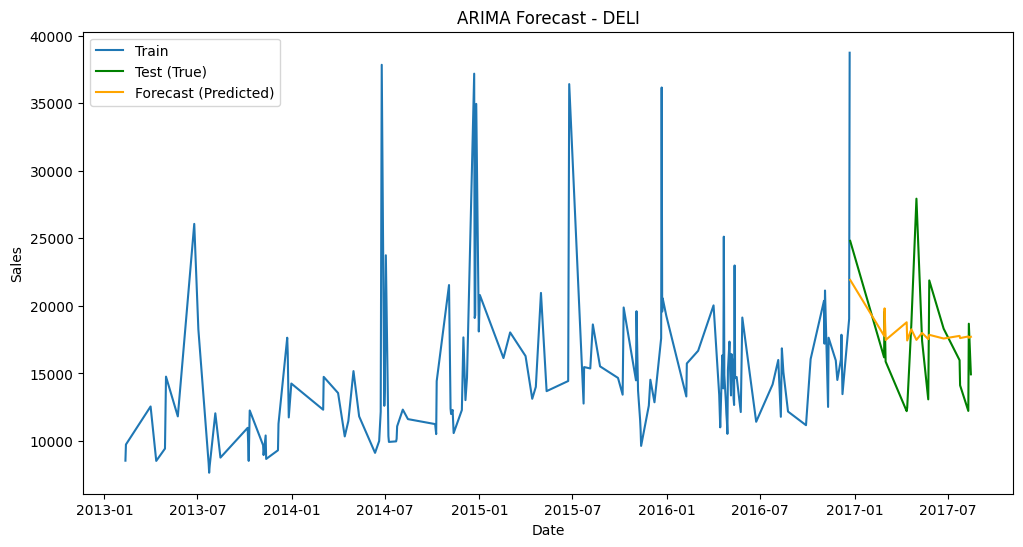

MAE: 3118.5792
WAPE: 0.1801
SMAPE: 0.1792


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

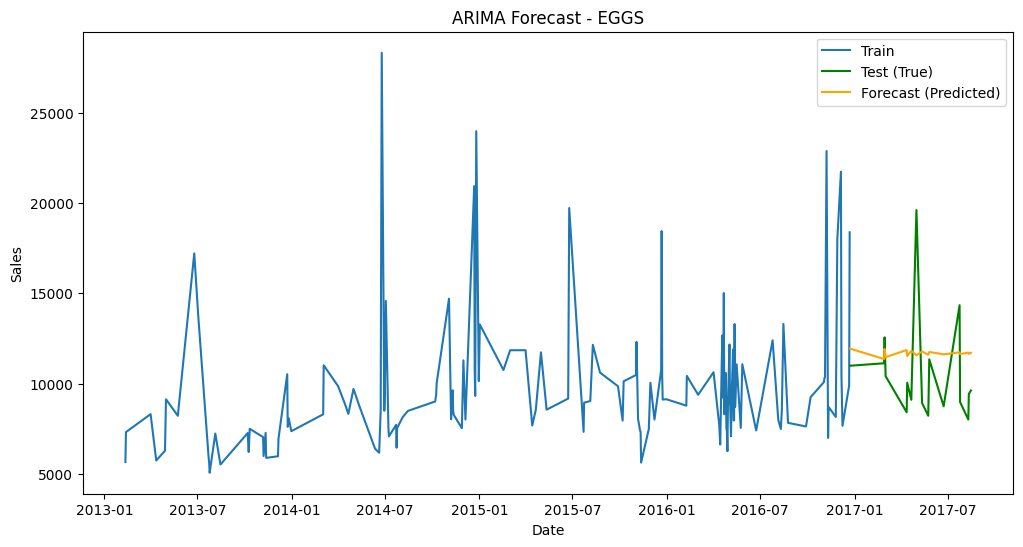

MAE: 2431.6438
WAPE: 0.2297
SMAPE: 0.2162


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

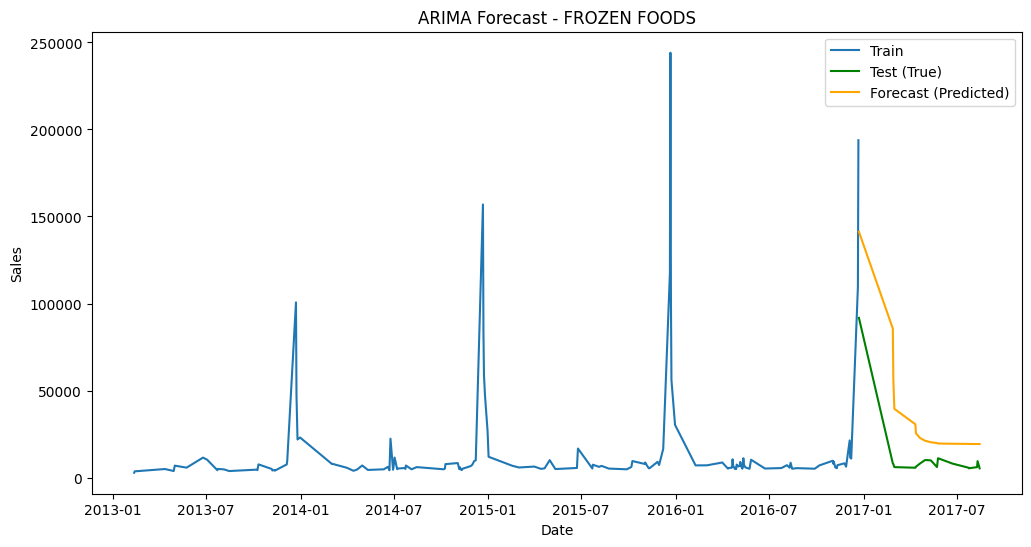

MAE: 22801.1386
WAPE: 1.8400
SMAPE: 1.0316


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

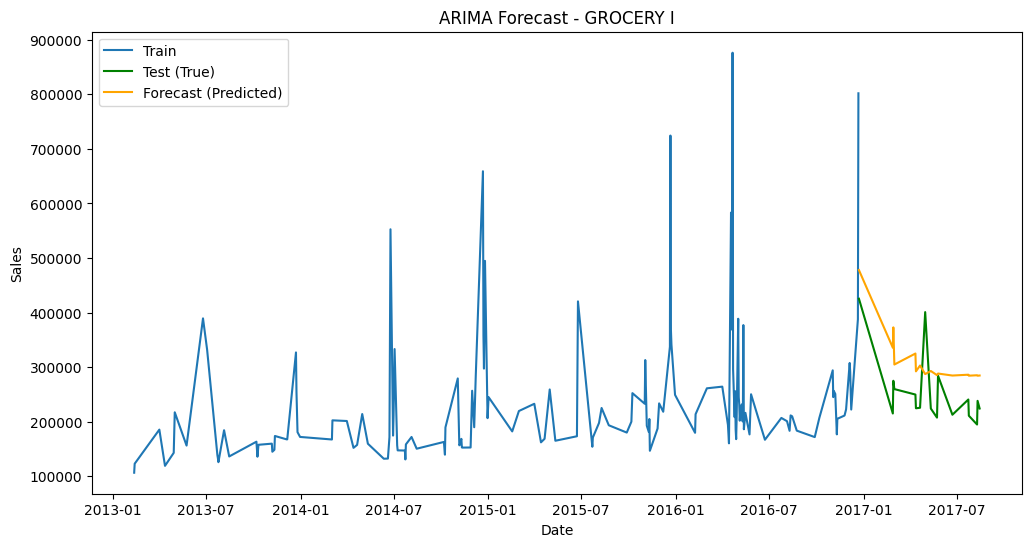

MAE: 69864.1813
WAPE: 0.2753
SMAPE: 0.2532


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

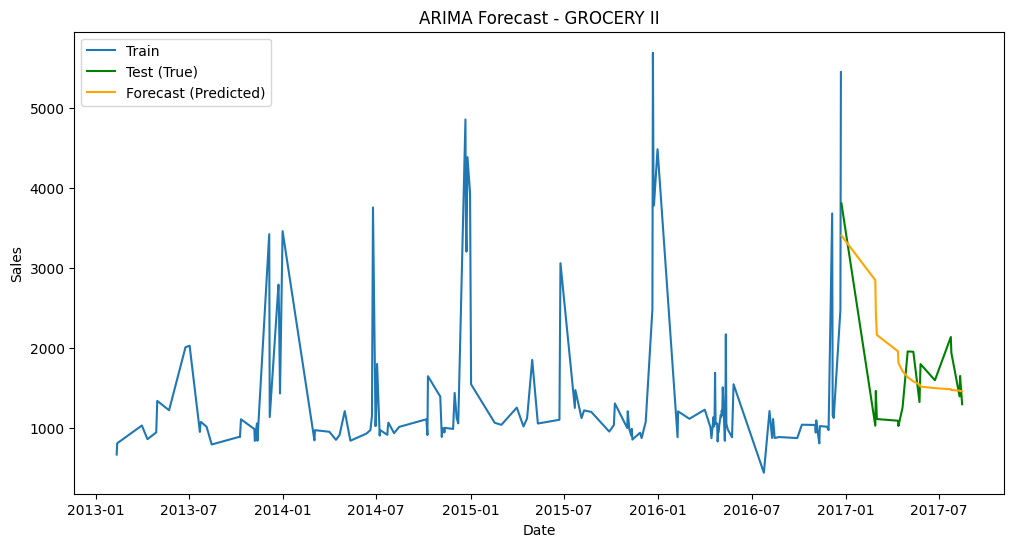

MAE: 541.3882
WAPE: 0.3301
SMAPE: 0.3127


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/base/model

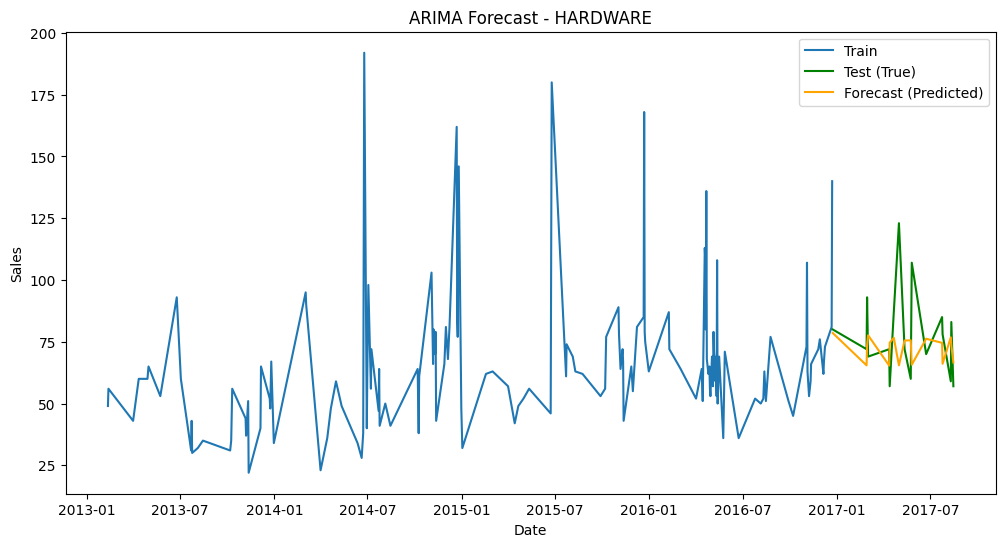

MAE: 14.9416
WAPE: 0.1918
SMAPE: 0.1907


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

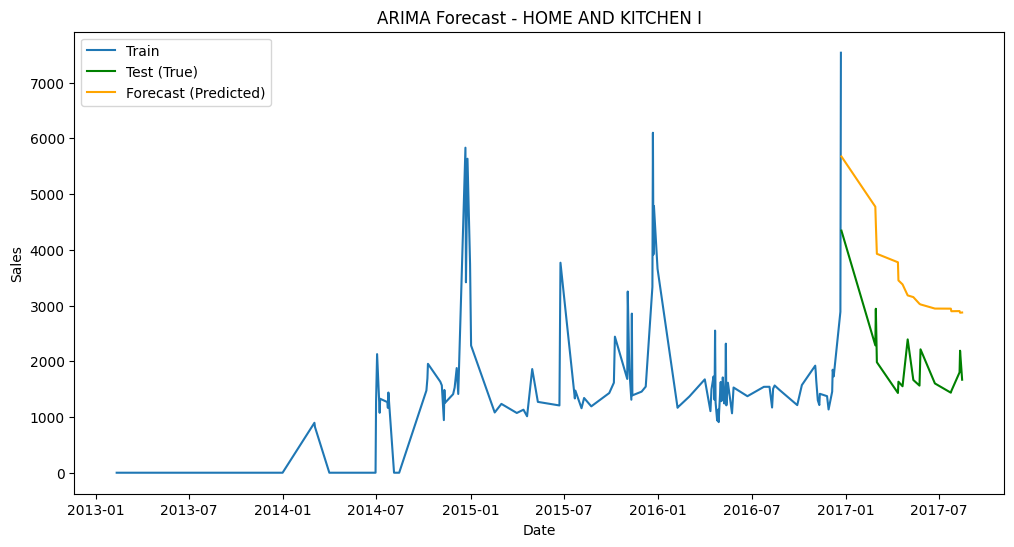

MAE: 1476.3564
WAPE: 0.7346
SMAPE: 0.5558


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/states

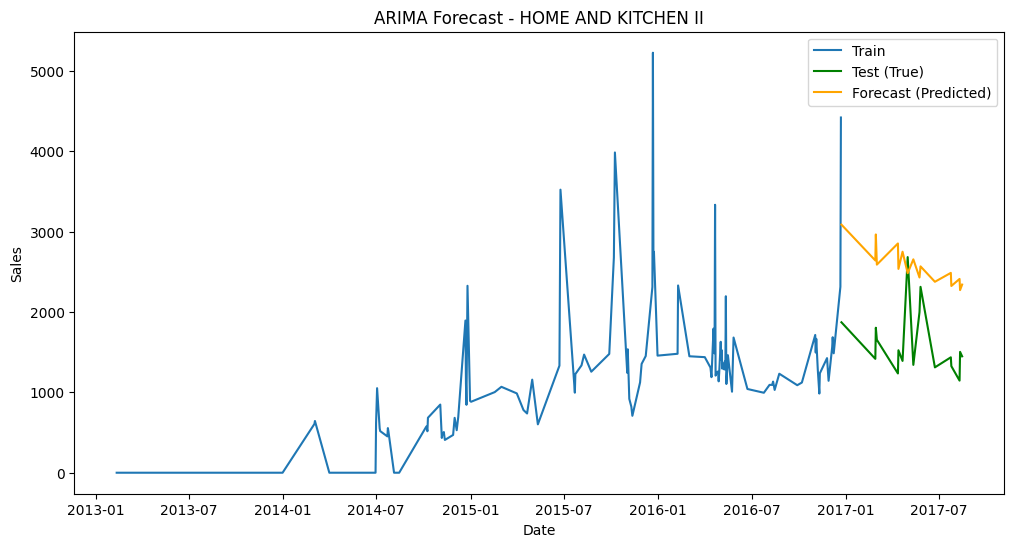

MAE: 986.0493
WAPE: 0.6117
SMAPE: 0.4853


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

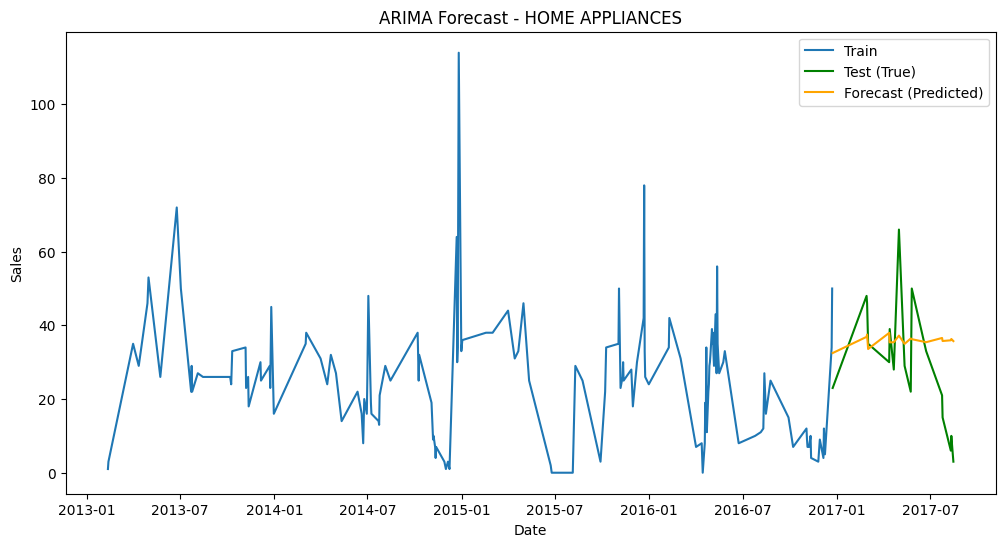

/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MAE: 14.1285
WAPE: 0.4766
SMAPE: 0.5091


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


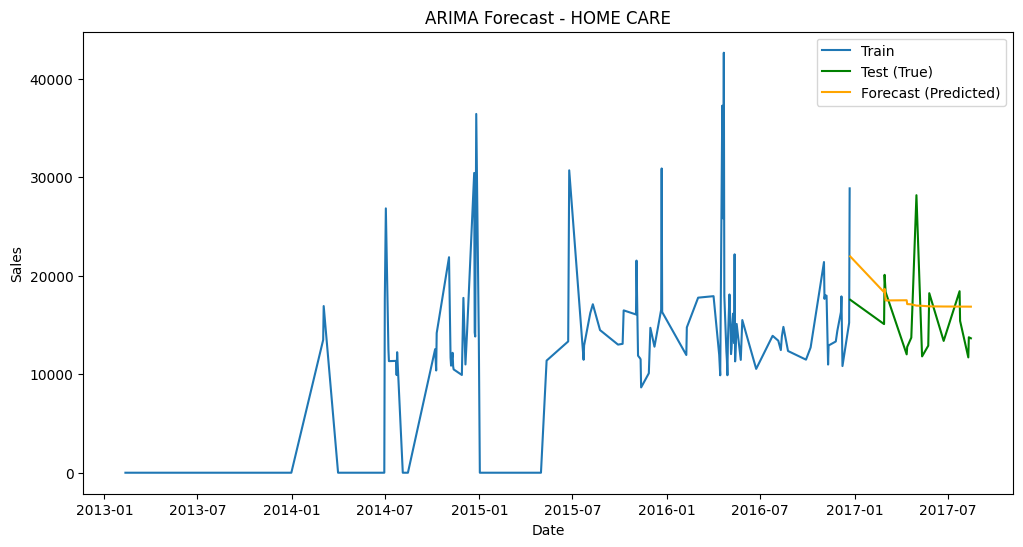

MAE: 3692.7062
WAPE: 0.2352
SMAPE: 0.2237


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

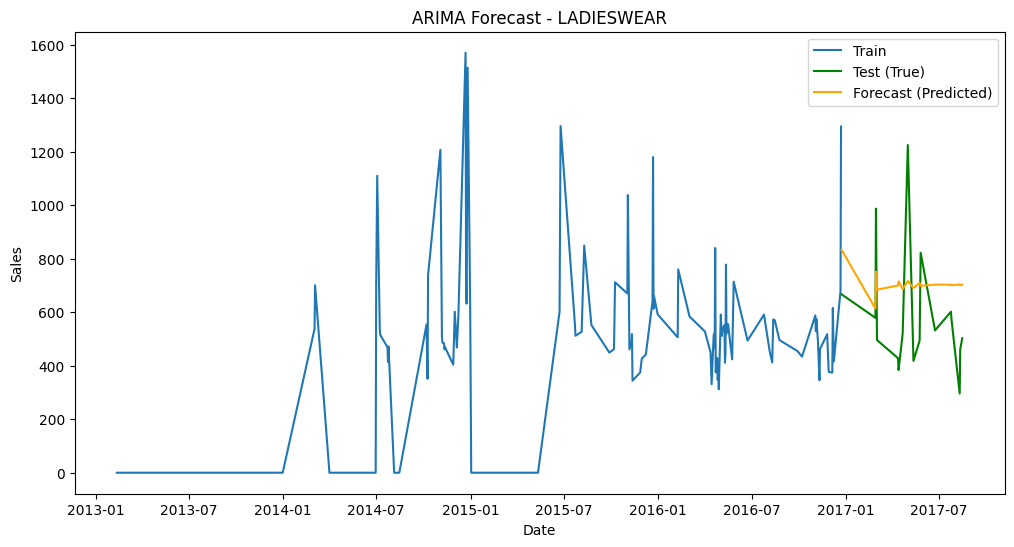

MAE: 221.2656
WAPE: 0.3766
SMAPE: 0.3505


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

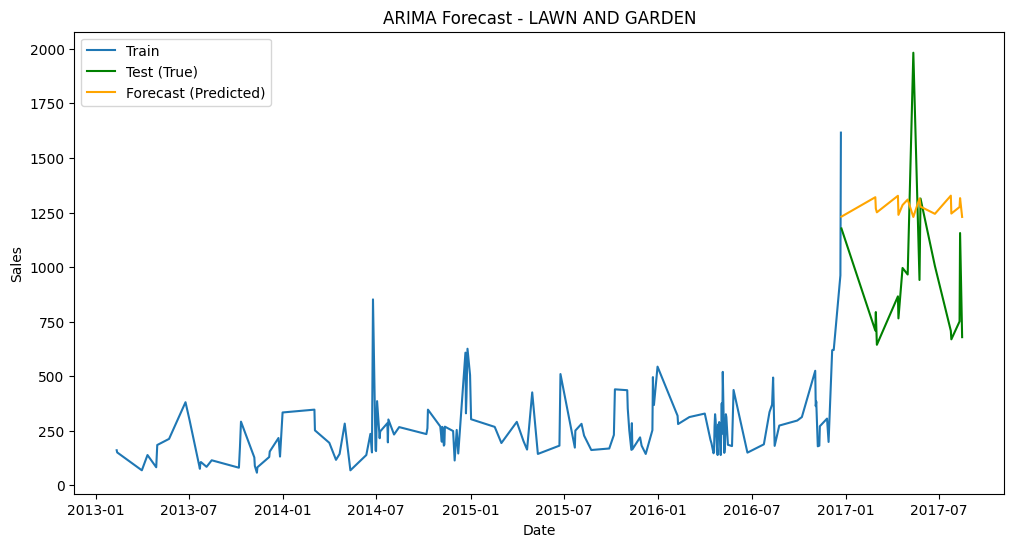

MAE: 420.3052
WAPE: 0.4432
SMAPE: 0.3924


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

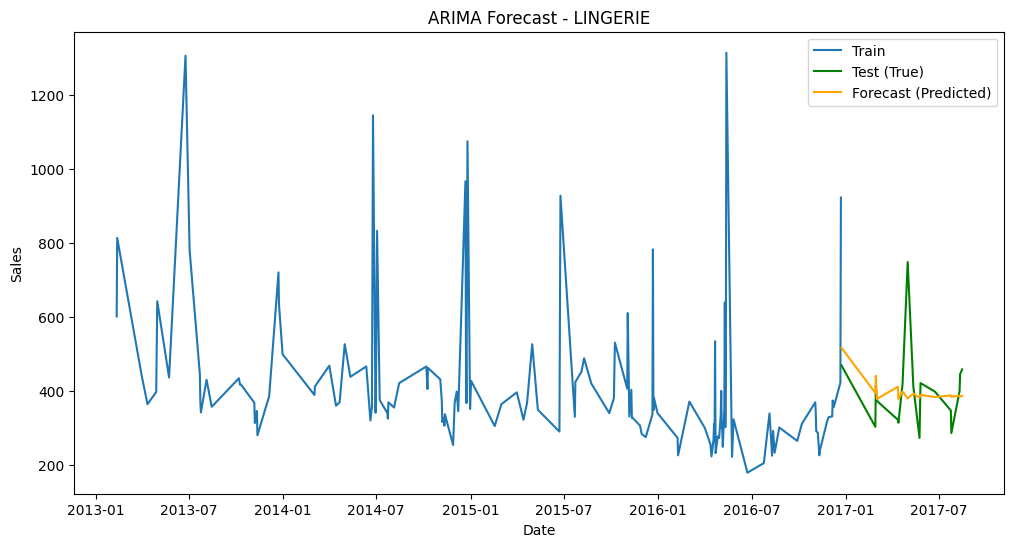

/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MAE: 68.7764
WAPE: 0.1719
SMAPE: 0.1653


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837:

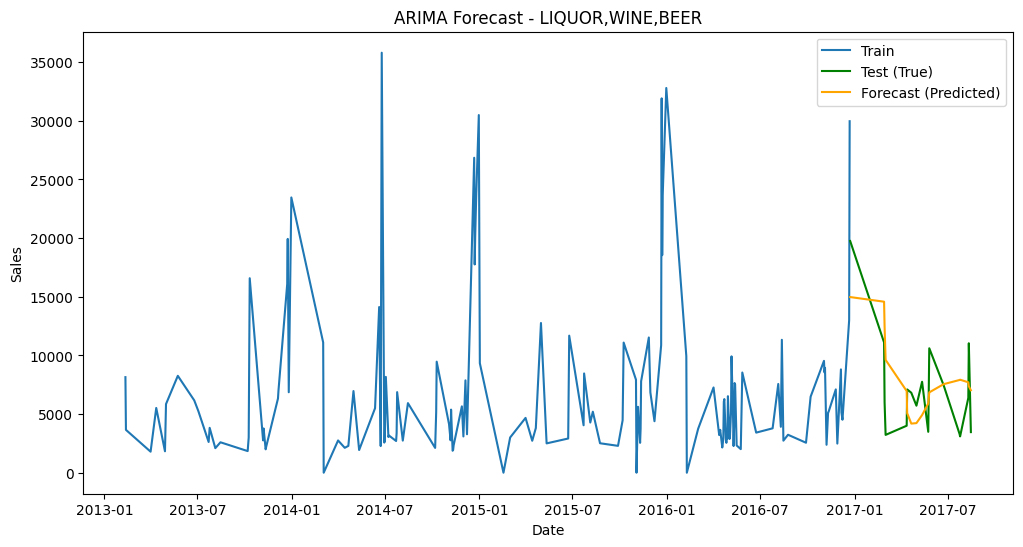

MAE: 3370.6078
WAPE: 0.4764
SMAPE: 0.4860


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

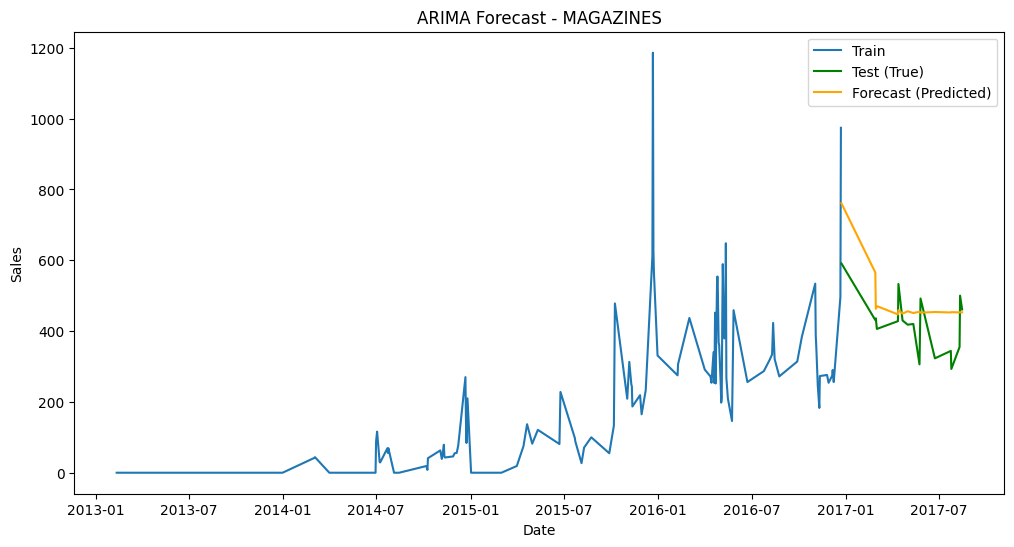

MAE: 77.4998
WAPE: 0.1838
SMAPE: 0.1761


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/base/model

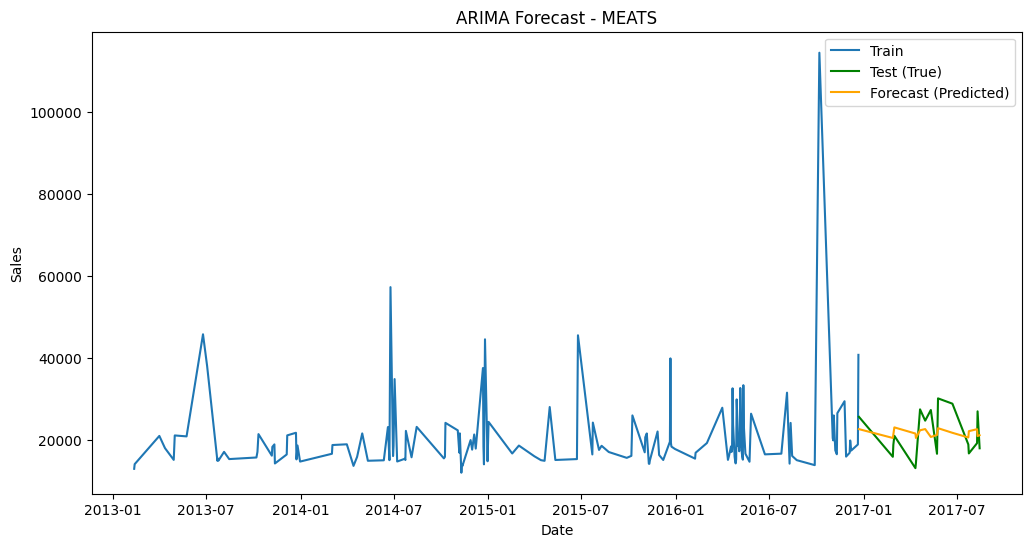

MAE: 4656.1059
WAPE: 0.2180
SMAPE: 0.2202


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

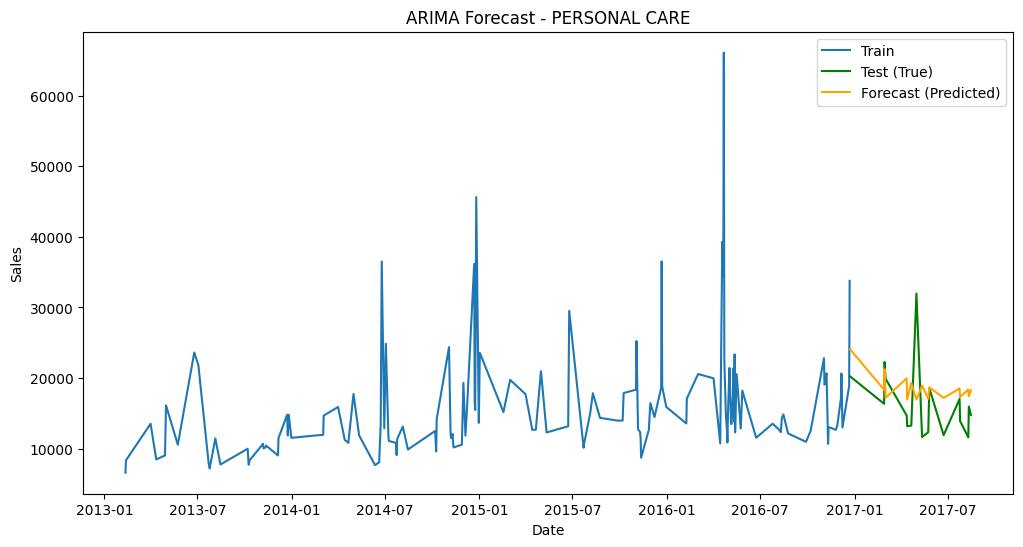

MAE: 4331.2617
WAPE: 0.2632
SMAPE: 0.2491


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/base/model

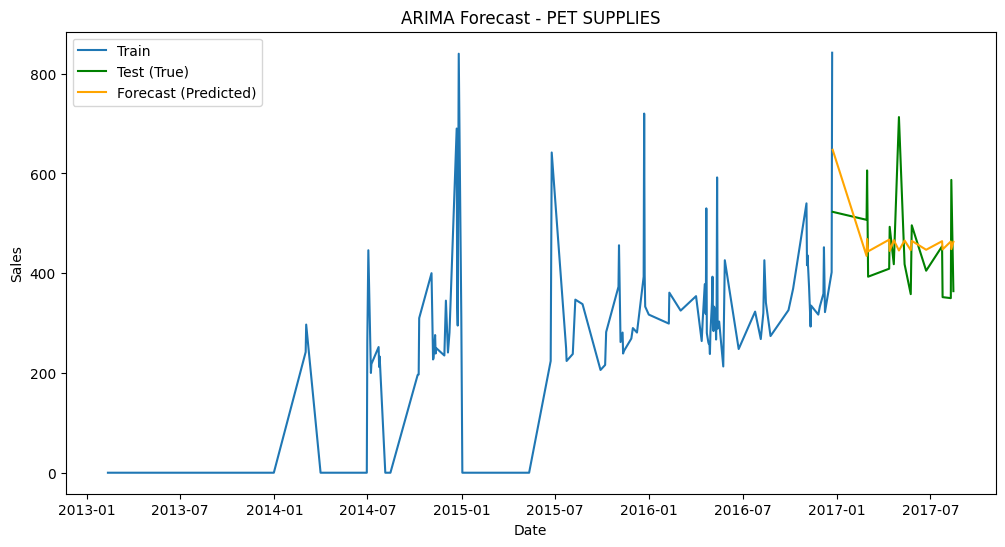

MAE: 86.6788
WAPE: 0.1878
SMAPE: 0.1817


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

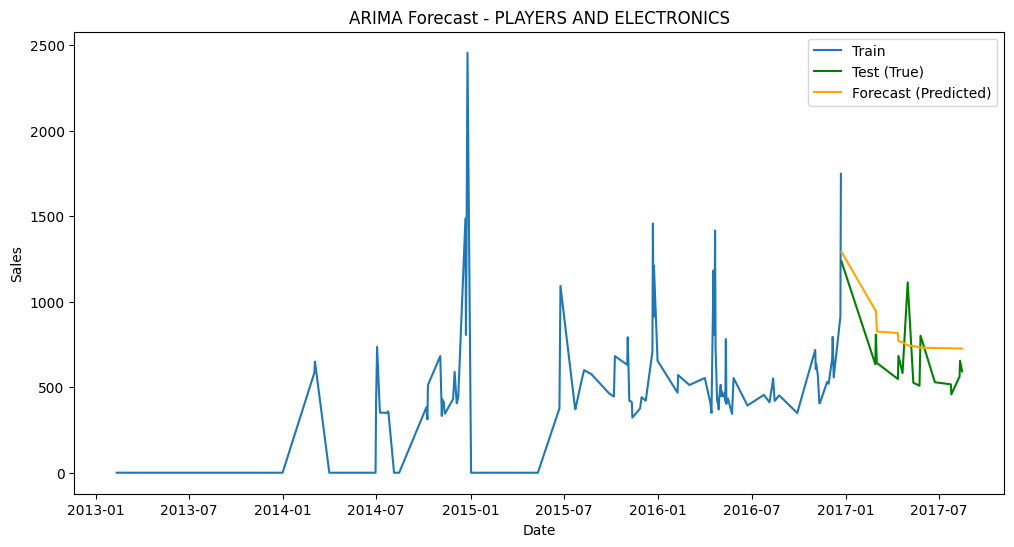

/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MAE: 186.1588
WAPE: 0.2777
SMAPE: 0.2648


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


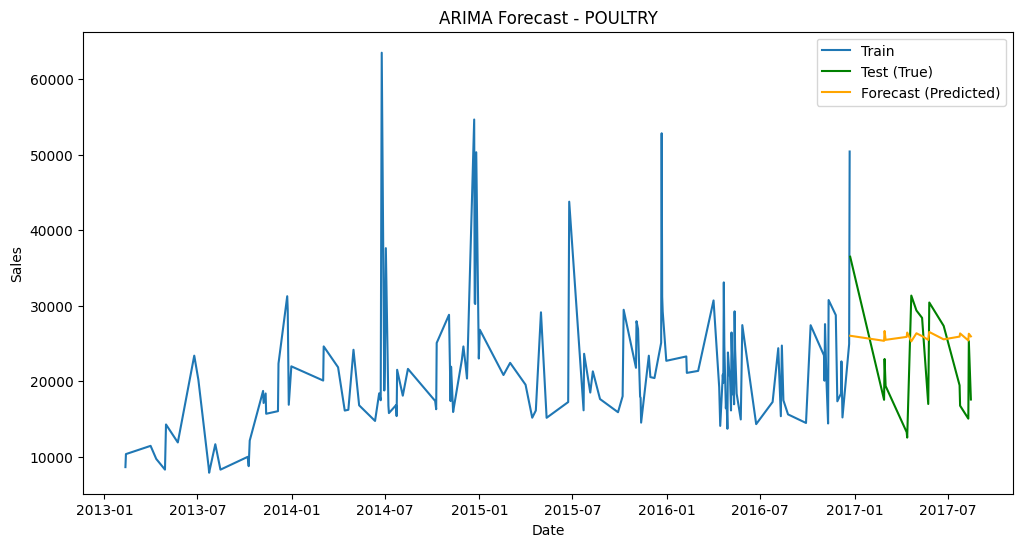

MAE: 6818.3933
WAPE: 0.3049
SMAPE: 0.3031


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

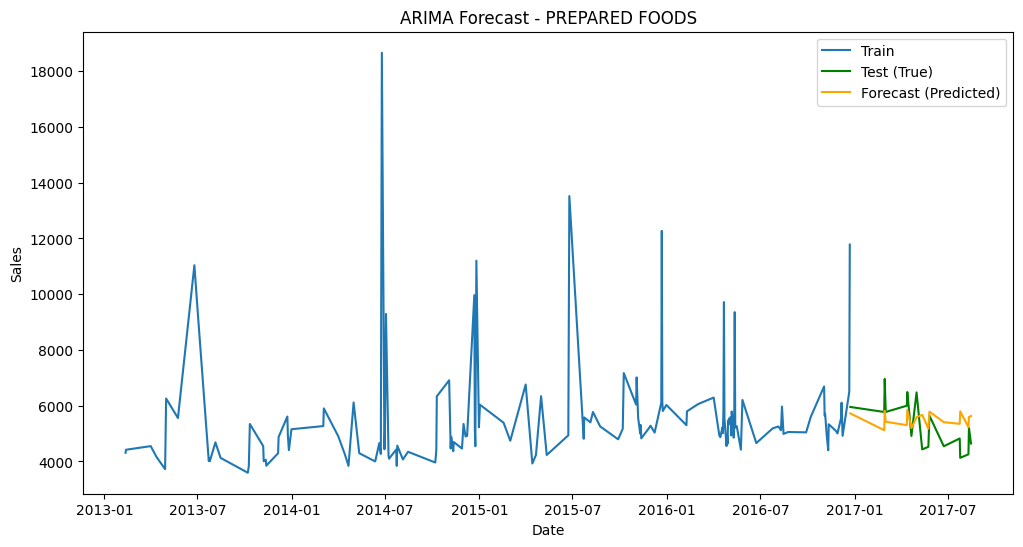

MAE: 726.0998
WAPE: 0.1363
SMAPE: 0.1366


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

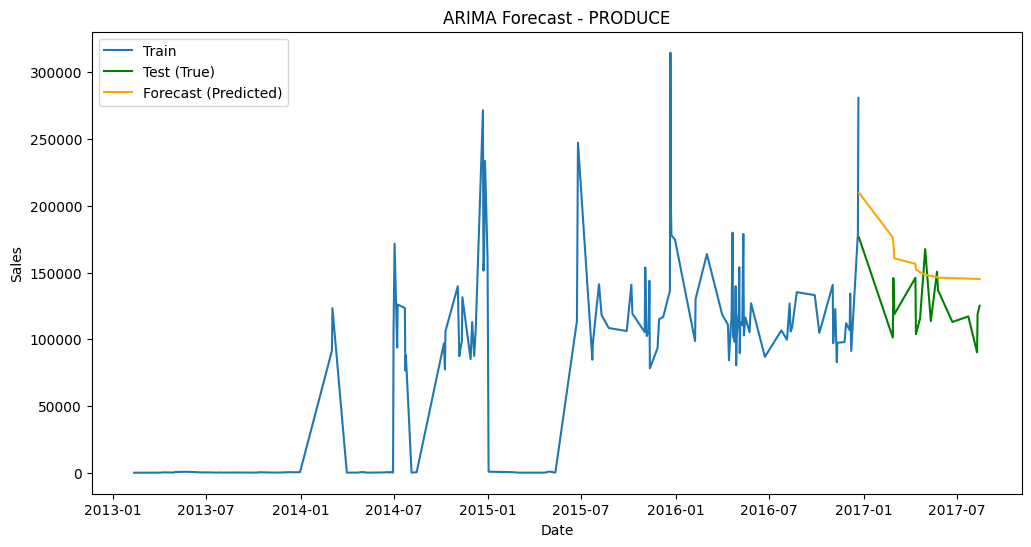

MAE: 31115.4816
WAPE: 0.2454
SMAPE: 0.2280


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

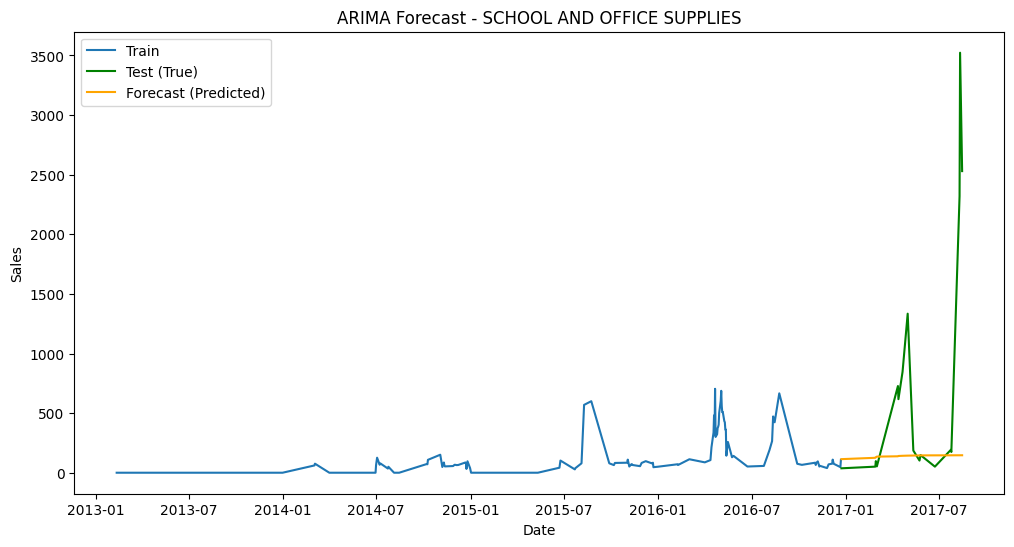

MAE: 671.5285
WAPE: 0.8790
SMAPE: 0.9467


/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/tsa/base/t

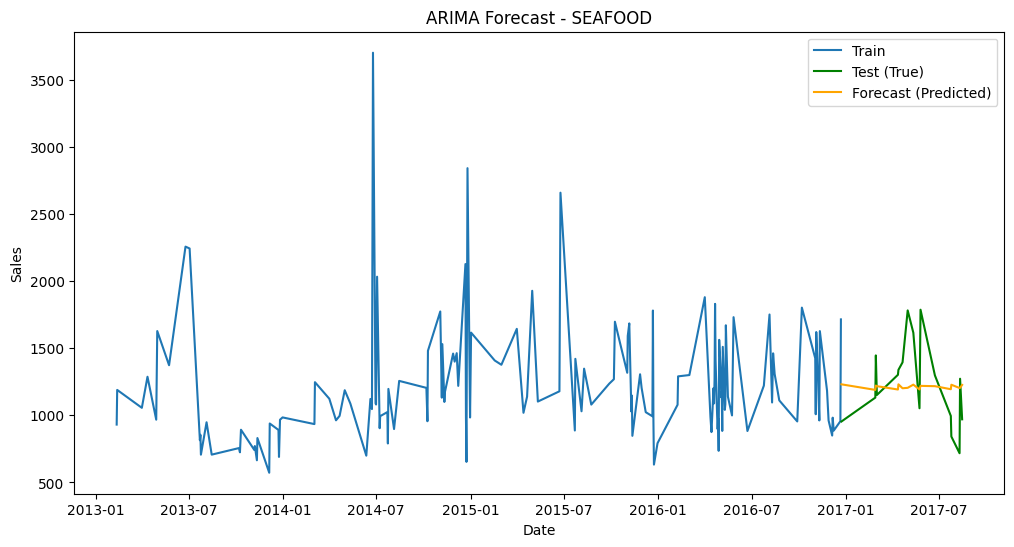

MAE: 246.0801
WAPE: 0.1987
SMAPE: 0.2013


In [49]:
for prod_name in ts['family'].unique():
  train, test = get_prod_data(prod_name)

  train_model(train, test, prod_name)

# Graph Construction, Train-Valid-Test split

In [ ]:
!pip install torch_geometric
import networkx as nx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.5 MB/s eta 0:00:00


In [ ]:
import torch

features = []

for prod_name, prod_series in df.groupby(['Product']):
    features.append(prod_series['Units Sold'].values.tolist())

min_len = min(len(f) for f in features)
features_trunc = [f[:min_len] for f in features]
features_tensor = torch.tensor(features_trunc, dtype=torch.float32)
print("All features shape:", features_tensor.shape)  # [num_products, min_len]

# Split ratios
train_ratio = 0.7
valid_ratio = 0.15  # e.g., 15% for validation, rest for test
test_ratio = 1 - train_ratio - valid_ratio

train_idx = int(min_len * train_ratio)
valid_idx = int(min_len * (train_ratio + valid_ratio))

features_train = features_tensor[:, :train_idx]
features_valid = features_tensor[:, train_idx:valid_idx]
features_test = features_tensor[:, valid_idx:]

print("Train shape:", features_train.shape)   # [num_products, train_len]
print("Valid shape:", features_valid.shape)   # [num_products, valid_len]
print("Test shape:", features_test.shape)     # [num_products, test_len]

def create_sliding_windows(features, window, horizon):
    # features: [num_products, total_len]
    num_products, total_len = features.shape
    X, Y = [], []
    for i in range(total_len - window - horizon + 1):
        x = features[:, i:i+window]           # [num_products, window]
        y = features[:, i+window:i+window+horizon] # [num_products, horizon]
        X.append(x)
        Y.append(y)
    X = torch.stack(X)  # [num_samples, num_products, window]
    Y = torch.stack(Y)  # [num_samples, num_products, horizon]
    return X, Y

# Choose window and horizon
window = 30
horizon = 10

X_train, Y_train = create_sliding_windows(features_train, window, horizon)
X_valid, Y_valid = create_sliding_windows(features_valid, window, horizon)
X_test, Y_test   = create_sliding_windows(features_test, window, horizon)

print(X_train.shape, Y_train.shape)  # [num_samples, 6, 30], [num_samples, 6, 7]

All features shape: torch.Size([6, 1606])
Train shape: torch.Size([6, 1124])
Valid shape: torch.Size([6, 241])
Test shape: torch.Size([6, 241])
torch.Size([1085, 6, 30]) torch.Size([1085, 6, 10])


In [ ]:
num_products = 6
edge_list = []

for i in range(num_products):
    for j in range(num_products):
        if i != j:
            edge_list.append([i, j])  # edge from i to j

edge_index = torch.tensor(edge_list, dtype=torch.long).t()  # shape [2, num_edges]

Epoch 1/100 | Train Loss: 36690.0577 | Val Loss: 4776.9271
Epoch 10/100 | Train Loss: 21533.9022 | Val Loss: 4203.6495
Epoch 20/100 | Train Loss: 19683.1272 | Val Loss: 3896.3151
Epoch 30/100 | Train Loss: 19290.3103 | Val Loss: 4103.2730
Epoch 40/100 | Train Loss: 20138.9247 | Val Loss: 3871.1877
Epoch 50/100 | Train Loss: 19322.2437 | Val Loss: 3983.6295
Epoch 60/100 | Train Loss: 19942.6174 | Val Loss: 3895.3403
Epoch 70/100 | Train Loss: 19382.4111 | Val Loss: 3942.6955
Epoch 80/100 | Train Loss: 19330.0254 | Val Loss: 4112.8556
Epoch 90/100 | Train Loss: 19224.5841 | Val Loss: 3810.4392
Epoch 100/100 | Train Loss: 18928.3871 | Val Loss: 3741.5387


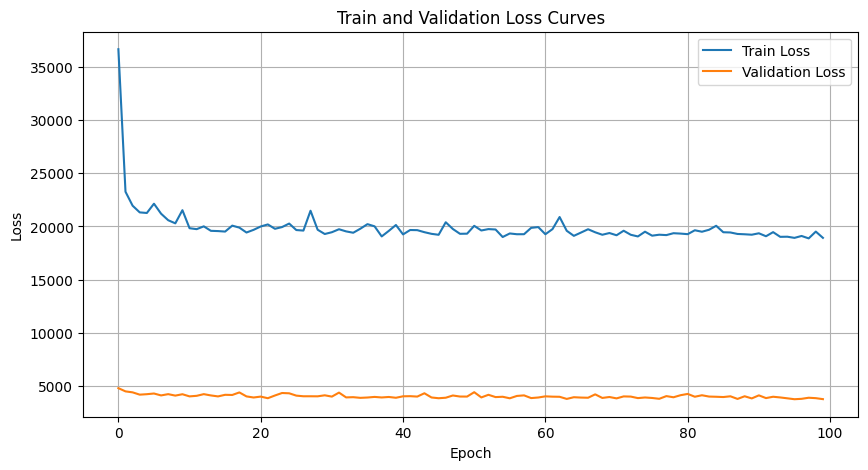

In [ ]:
import torch
from torch_geometric.nn import GCNConv
import torch.nn as nn
import torch.optim as optim

class MultiStepGNN(torch.nn.Module):
    def __init__(self, window, horizon):
        super().__init__()
        self.gcn1 = GCNConv(window, 16)
        self.gcn2 = GCNConv(16, horizon)  # output: 7 days ahead for each product

    def forward(self, x, edge_index):
        h = torch.relu(self.gcn1(x, edge_index))
        out = self.gcn2(h, edge_index)  # shape: [num_products, horizon]
        return out

model = MultiStepGNN(window, horizon)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 100
batch_size = 16
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    permutation = torch.randperm(X_train.size(0))
    train_loss = 0
    for i in range(0, X_train.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        x_batch = X_train[indices]  # [batch, 6, window]
        y_batch = Y_train[indices]  # [batch, 6, horizon]
        loss = 0
        for xb, yb in zip(x_batch, y_batch):
            output = model(xb, edge_index)
            loss += loss_fn(output, yb)
        loss /= x_batch.size(0)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= (X_train.size(0) // batch_size)

    # Validation
    model.eval()
    with torch.no_grad():
        val_loss = 0
        for xb, yb in zip(X_valid, Y_valid):
            output = model(xb, edge_index)
            val_loss += loss_fn(output, yb).item()
        val_loss /= X_valid.size(0)

    # Store losses
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

# Plotting
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss Curves')
plt.legend()
plt.grid()
plt.show()

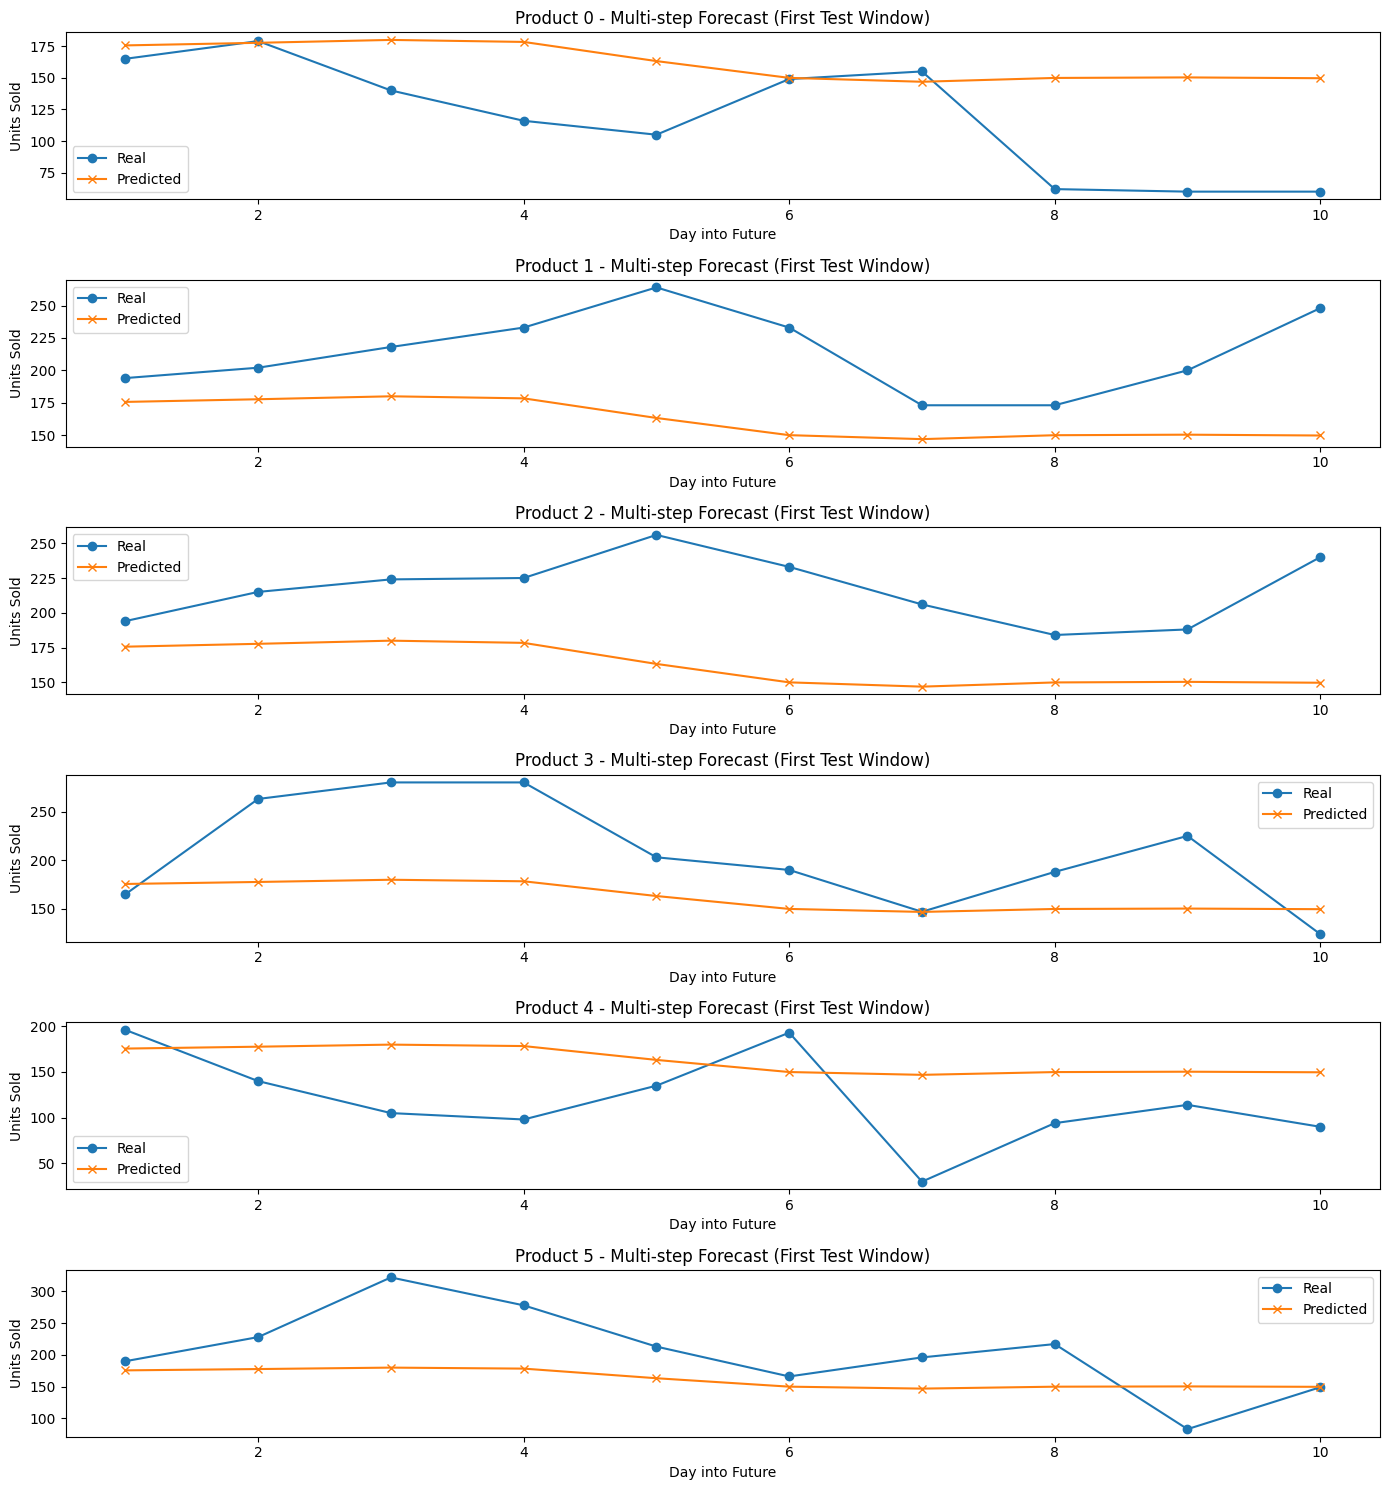

In [ ]:
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
    # Predict for the first test window
    test_input = X_test[0]         # [num_products, window]
    real_target = Y_test[0]        # [num_products, horizon]
    predictions = model(test_input, edge_index)  # [num_products, horizon]

    pred_np = predictions.detach().cpu().numpy()
    real_np = real_target.detach().cpu().numpy()

num_products = pred_np.shape[0]
horizon = pred_np.shape[1]

plt.figure(figsize=(14, 2.5 * num_products))
for idx in range(num_products):
    plt.subplot(num_products, 1, idx + 1)
    plt.plot(range(1, horizon+1), real_np[idx], label='Real', marker='o')
    plt.plot(range(1, horizon+1), pred_np[idx], label='Predicted', marker='x')
    plt.title(f'Product {idx} - Multi-step Forecast (First Test Window)')
    plt.xlabel('Day into Future')
    plt.ylabel('Units Sold')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss = 0
model.eval()
with torch.no_grad():
    for xb, yb in zip(X_test, Y_test):
        output = model(xb, edge_index)
        test_loss += loss_fn(output, yb).item()
    test_loss /= X_test.size(0)
print(f"Average Test Loss: {test_loss:.4f}")

Average Test Loss: 2727.8179
